In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import numpy as np

In [2]:
# Define Overproduction and Flex parameters
RP = [10,100,1000,10000]

In [3]:
def expected_annual_impact_calculation(op1, if1, cif, RP, k):

    total_cost_results = pd.DataFrame()
    for i in range(len(RP)):

            rp = RP[i]
            ci_f = cif
            op_factor = op1
            imp_flex  = if1
            path = os.path.join(os.path.dirname(os.getcwd()), 'results')
            
            # Rationing corrected output loss
            Xbase = pd.read_excel(os.path.join(path, f'Xbase_{op_factor}_{imp_flex}_mosek_{ci_f}_{rp}_{k}.xlsx'), index_col = [0], header = [1])
            Xbase = Xbase.drop("Index2", axis = 'index')
            Xbase_sum = Xbase.sum().sum()
            
            X1 = pd.read_excel(os.path.join(path, f'Xdis3_{op_factor}_{imp_flex}_mosek_{ci_f}_{rp}_{k}.xlsx'), index_col = [0], header = [1])
            X1 = X1.drop("Index2", axis = 'index')
            X1_sum = X1.sum().sum()
            
            rat = pd.read_excel(os.path.join(path, f'Rat_{op_factor}_{imp_flex}_mosek_{ci_f}_{rp}_{k}.xlsx'), index_col = [0], header = [0,1])
            rat_sum = rat.sum().sum()
            
            c3 = (Xbase_sum - X1_sum) - rat_sum
            
            
            # Actual inefficiency
            ineff1 = pd.read_excel(os.path.join(path, f'ineff3_{op_factor}_{imp_flex}_mosek_{ci_f}_{rp}_{k}.xlsx'), index_col = [0], header = [1])
            ineff1 = ineff1.drop("Index2", axis = 'index')
            ineff1 = ineff1.sum().sum()
            
            c2 = ineff1
            
            # Production equivalent of ratioing
            X2 = pd.read_excel(os.path.join(path, f'Xdis5_{op_factor}_{imp_flex}__mosek_{ci_f}_{rp}_{k}.xlsx'), index_col = [0], header = [1])
            X2 = X2.drop("Index2", axis = 'index')
            X2_sum = X2.sum().sum()
            c1 = X2_sum 

            cost = (c1 + c2+ c3 ) / 365
            total_cost_results.loc[rp, 'cost_per_day'] = cost

    recovery_duration = []
    no_of_flooded = []

    for i in range(len(RP)):
        rp = RP[i]
        path = os.path.join(os.path.dirname(os.getcwd()), 'results')
        osm = pd.read_excel(os.path.join(path, f'osm_industrial_{op_factor}_{imp_flex}_mosek_{rp}_{k}.xlsx'), index_col = [0], header = [0])
        osm_failed = osm[osm['flood_fail'] == 0]
        osm_failed['duration'] = (osm_failed['depth'] * 16.6) + 7.738  # From T. Endendijk et al.(2024)
        recovery_duration.append(osm_failed['duration'].mean())
        no_of_flooded.append(len(osm_failed))

    no_of_flooded_log = [math.log10(x+1) for x in no_of_flooded]
    total_cost_results['cost'] = total_cost_results['cost_per_day'] * recovery_duration * no_of_flooded_log
    return total_cost_results

In [4]:
total_cost_results_ci = expected_annual_impact_calculation(1.01, 0.25, 'ci', RP, 1)
total_cost_results_noci = expected_annual_impact_calculation(1.01, 0.25, 'noci', RP, 1)

C:\Users\sva100\AppData\Local\Temp\ipykernel_34844\4180137359.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osm_failed['duration'] = (osm_failed['depth'] * 16.6) + 7.738  # From T. Endendijk et al.(2024)
C:\Users\sva100\AppData\Local\Temp\ipykernel_34844\4180137359.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osm_failed['duration'] = (osm_failed['depth'] * 16.6) + 7.738  # From T. Endendijk et al.(2024)
C:\Users\sva100\AppData\Local\Temp\ipykernel_34844\4180137359.py:51: SettingWithCopyWarnin

In [5]:
total_cost_results_ci

,cost_per_day,cost
10,0.001043,0.017633
100,0.001043,0.031464
1000,6.532427,482.114273
10000,26.601551,2507.632787


In [6]:
total_cost_results_noci

,cost_per_day,cost
10,0.001043,0.017633
100,0.001043,0.031464
1000,4.299437,317.312426
10000,18.939380,1785.347369


#### Data for heatmap

In [7]:
path = os.path.dirname(os.getcwd())

In [8]:
data = pd.read_excel(os.path.join(path, 'eac_ci_df.xlsx'), index_col = 0)
data1 = pd.read_excel(os.path.join(path, 'eac_noci_df.xlsx'), index_col = 0)

In [9]:
font = 'Calibri'
c11 = '#780000'
c21 = '#c1121f'
size_font = 10
cmap = 'OrRd'

In [10]:
data = data.iloc[:,0:3]

In [11]:
data1 = data1.iloc[:,0:3]

In [12]:
data2 = ((data -data1)/data)*100

In [13]:
data2 

,0,1,2
0,78.372861,23.465232,0.0
1,75.569998,32.361344,0.0
2,86.759804,42.559261,0.0


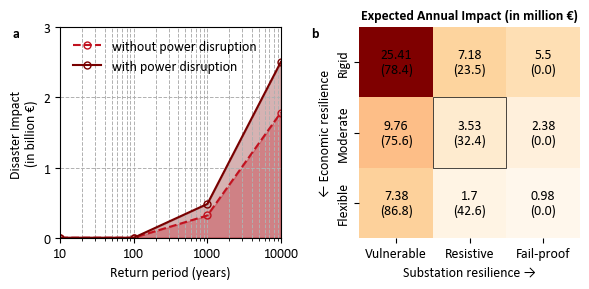

In [16]:
fig = plt.figure(figsize=(6, 3))
gs = gridspec.GridSpec(1, 2, height_ratios=[1])

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.plot(total_cost_results_noci.index, total_cost_results_noci['cost']/1000, markersize =5, c = c21, linewidth = 1.5, marker = 'o', markerfacecolor='none', linestyle='--', label = 'without power disruption')
ax0.plot(total_cost_results_ci.index, total_cost_results_ci['cost']/1000, markersize =5, c = c11, linewidth = 1.5, marker = 'o', markerfacecolor='none', linestyle='-' , label = 'with power disruption')
ax0.fill_between(total_cost_results_ci.index, total_cost_results_ci['cost']/1000,
                 color=c11, alpha=0.3)
ax0.fill_between(total_cost_results_noci.index, total_cost_results_noci['cost']/1000,
                 color=c21, alpha=0.3)

# Axes scaling and limits
ax0.set_xlim([10, 10000])
ax0.set_ylim([0, 3])
ax0.set_xscale('log')


# Ticks and labels
ax0.set_xticks(total_cost_results_ci.index)
ax0.set_xticklabels(total_cost_results_ci.index, fontsize=10, fontname=font)
ax0.set_yticks(np.linspace(0, 3, 4))  # You can change the ticks as needed
ax0.tick_params(axis='y', labelsize=10)
for label in ax0.get_yticklabels():
    label.set_fontname(font)

# Labels and legend
ax0.set_xlabel('Return period (years)', fontsize=size_font, fontname=font)
ax0.set_ylabel('Disaster Impact \n(in billion €)', fontsize=size_font, fontname=font)
ax0.legend(loc='upper left', prop={'family': font, 'size': size_font}, frameon=False)

# Grid
ax0.grid(True, which='both', linestyle='--', linewidth=0.7)


y_labels = ['Rigid', 'Moderate', 'Flexible']
x_labels = ['Vulnerable', 'Resistive', 'Fail-proof']

# rounded_data1 = data.round(2).astype(str)
# rounded_data2 = data2.round(2).astype(str)

# combined_annot = rounded_data1 + '\n' + rounded_data2

ax1 = sns.heatmap(
    data, 
    annot= False, 
    fmt='', 
    cmap=cmap, 
    cbar=False,
    xticklabels=x_labels, 
    yticklabels=y_labels,
    annot_kws={"fontsize": size_font, "fontname": font}
)



for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val1 = round(data.iloc[i, j], 2) 
        val2 = round(data2.iloc[i, j], 1)
        ax1.text(
            j + 0.5, i + 0.5,
            f"{val1}\n({val2})",
            ha='center', va='center',
            fontsize=size_font, fontname=font
        )

rect = patches.Rectangle(
    (1, 1), 1, 1,
    fill=False,
    edgecolor='black',
    linewidth=0.5,
    linestyle='-'
)
ax1.add_patch(rect)



ax1.set_xticklabels(x_labels, fontsize=size_font, fontname=font)
ax1.set_yticklabels(y_labels, fontsize=size_font, fontname=font, rotation=90)
ax1.set_xlabel('Substation resilience →', fontsize=size_font, fontname=font)
ax1.set_ylabel('← Economic resilience', fontsize=size_font, fontname=font)
ax1.set_title('Expected Annual Impact (in million €)', fontsize=size_font, fontname=font, fontweight='bold')

ax0.text(-0.2, 1, 'a', transform=ax0.transAxes,
         ha='center', va='top', fontweight='bold', fontsize=10, family='calibri')

ax1.text(-0.2, 1, 'b', transform=ax1.transAxes,
         ha='center', va='top', fontweight='bold', fontsize=10, family='calibri')
plt.tight_layout()
plt.savefig('Figure2_RPcurves.png', dpi = 300, bbox_inches = 'tight')
plt.show()
